**Notes to Original Images Results:**

* Models exceeding no info baseline:
* Severe over-fitting with XGBoost, but not so with LightGBM. Still not particular good performance from LightGBM.


**Notes to Removed Broken Slices Results:**

* Models exceeding no info baseline:
* Severe over-fitting with LightGBM & XGBoost. May be too complex models applied to too little data. Optimization algorithm incapable of regularizing in each experiment.

In [1]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

%matplotlib inline

In [2]:
def plot_train_test(results, axis):

    test = results['test_score']
    train = results['train_score']
    test_std = np.sqrt(results['test_score_variance'])
    train_std = np.sqrt(results['train_score_variance'])

    # Repeated experiments.
    x_coords = np.arange(np.size(test))

    axis.plot(
        x_coords, 
        train, 
        color='blue', marker='o', markersize=5, 
        label=f"Training score"
    )
    axis.plot(
        x_coords, 
        test, 
        color='green', linestyle='--', marker='s', 
        label=f"Validation score"
    )
    axis.fill_between(
        x_coords, 
        train - train_std, 
        train + train_std, 
        alpha=0.15, color='blue'
    )
    axis.fill_between(
        x_coords, 
        test - test_std, 
        test + test_std, 
        alpha=0.15, color='green'
    )
    return axis

In [3]:
def print_params(model, estimator_name):
    
    for var_label in list(model.filter(regex=estimator_name).columns):
        var = np.copy(model[f'{var_label}'])
        try:
            var[np.where(np.isnan(var))] = -1
        except:
            pass
        print(var_label.split('__')[1])
        print('-' * 60)
        print(Counter(var))
        print('-' * 60)
        print('\n')

In [24]:
#results = pd.read_csv(
#    './../../data_source/results/original_images/results_all_features_original_images.csv',
#    index_col=0
#)
#results = pd.read_csv(
#    './../../data_source/results/removed_broken_slices/results_all_features_removed_broken_slices.csv',
#    index_col=0
#)
results = pd.read_csv(
    './../../data_source/results/hassan_original_images/results_all_features_icc.csv',
    index_col=0
)

In [25]:
#list(np.unique(orig_results['experiment_id'].values))

# Fisher Score & SVC

In [26]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'SVCEstimator'
fisher_svc = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

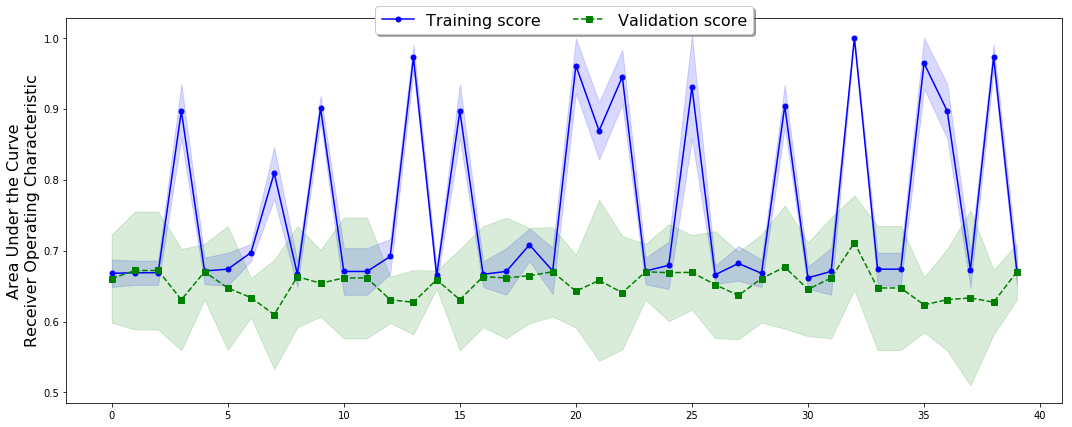

In [29]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_svc, axis)

plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

# Fisher Score & LightGBM

In [7]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'LightGBM'
fisher_gbm = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

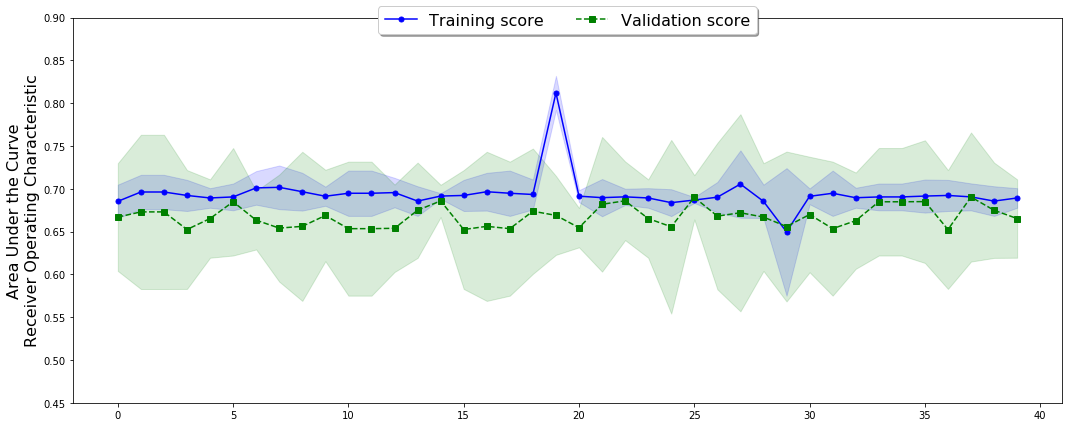

In [8]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_gbm, axis)

plt.ylim([0.45, 0.9])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [9]:
for var_label in list(fisher_gbm.filter(regex=estimator_name).columns):
    var = np.copy(fisher_gbm[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

learning_rate
------------------------------------------------------------
Counter({0.14329764159598882: 4, 0.05214921358147703: 3, 11.817946067791693: 3, 7.242095721968827: 3, 0.4301567370408205: 2, 4.409248466914707: 2, 2.8524069815959487: 2, 1.5358504232462349: 2, 5.613437465536716: 1, 0.3562720365176897: 1, 5.699184902164129: 1, 1.4394198470128363: 1, 36.875558985944494: 1, 4.226503194573665: 1, 2.944981322849477: 1, 2.6349858991157724: 1, 4.0858499803578505: 1, 28.42781752564312: 1, 32.67718749807801: 1, 4.670705177383128: 1, 5.216577513978736: 1, 18.932691136158475: 1, 33.33284711299553: 1, 39.20920131113165: 1, 7.4961761795820285: 1, 0.013726035566024137: 1, 4.881147722900958: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({162.0: 4, 116.0: 3, 127.0: 3, 238.0: 3, 485.0: 2, 182.0: 2, 22.0: 2, 221.0: 2, 198.0: 1, 357.0: 1, 228.0: 1, 445.0: 1, 118.0: 1, 281.0: 1, 362.0: 1, 301.0: 1, 4

Text(0.5, 0, 'Experimet')

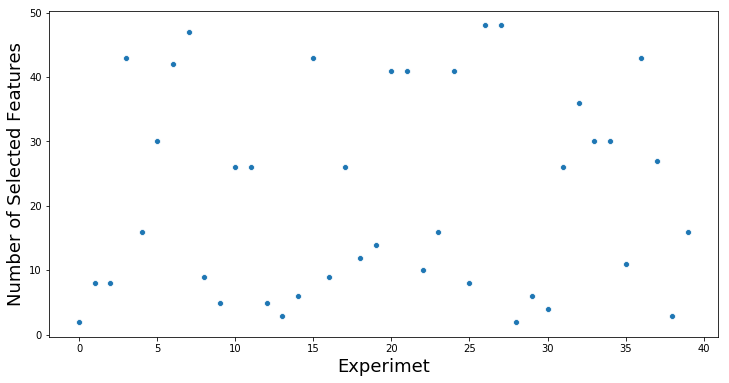

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    np.arange(fisher_gbm['FisherScoreSelection__num_features'].size),
    fisher_gbm['FisherScoreSelection__num_features']
)
plt.ylabel('Number of Selected Features', fontsize=18)
plt.xlabel('Experimet', fontsize=18)

# Wilcoxon & LightGBM

In [11]:
selector_name = 'WilcoxonSelection' 
estimator_name = 'LightGBM'
wlcx_gbm = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

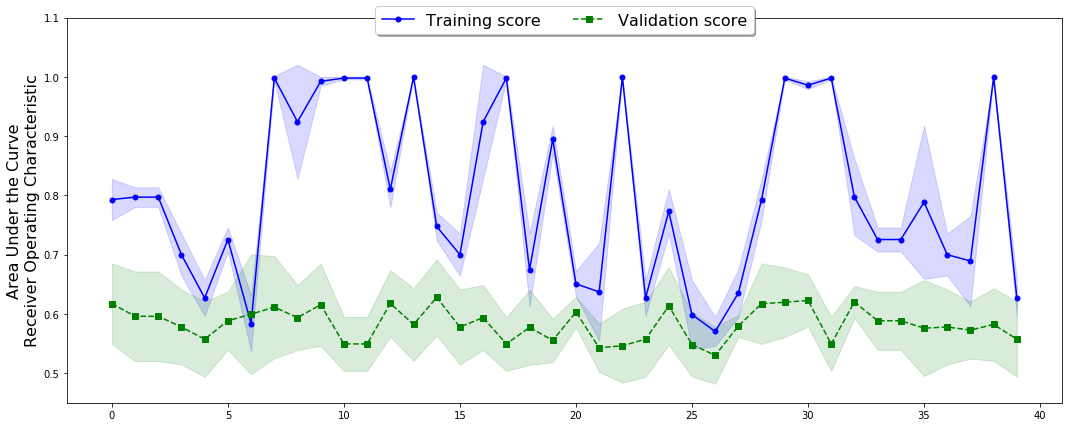

In [12]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(wlcx_gbm, axis)

plt.ylim([0.45, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [13]:
for var_label in list(wlcx_gbm.filter(regex=estimator_name).columns):
    var = np.copy(wlcx_gbm[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

learning_rate
------------------------------------------------------------
Counter({0.9351270015486366: 4, 0.9234613306057772: 3, 27.21286334169249: 3, 4.7765310103903404: 3, 0.15308488811697646: 2, 7.309212700746483: 2, 24.712743329583212: 2, 5.897241498679638: 2, 0.01: 2, 49.16692515755309: 1, 1.2111351268513604: 1, 3.976123873775244: 1, 3.5285519974589583: 1, 1.4148273878724218: 1, 44.43108679017436: 1, 8.410186415751943: 1, 42.12622617601162: 1, 1.862776318136688: 1, 0.1124342096552045: 1, 41.70682134736097: 1, 49.79538356965458: 1, 49.57989113716471: 1, 1.3771678016180178: 1, 4.39381829613748: 1, 13.914430208661626: 1, 49.35344236138239: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({5.0: 6, 111.0: 4, 330.0: 3, 369.0: 2, 137.0: 2, 145.0: 2, 136.0: 2, 432.0: 2, 48.0: 1, 185.0: 1, 397.0: 1, 377.0: 1, 448.0: 1, 497.0: 1, 146.0: 1, 489.0: 1, 398.0: 1, 44.0: 1, 240.0: 1, 192.0: 1, 87.0: 

# Fisher score & XGBoost 

In [14]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'XGBoost'
fisher_boost_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

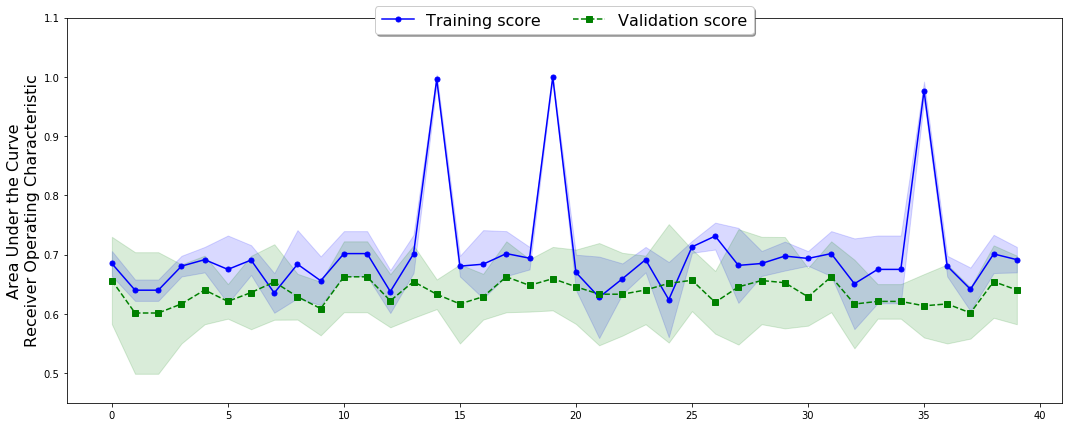

In [15]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_boost_results, axis)

plt.ylim([0.45, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [16]:
print_params(fisher_boost_results, estimator_name)

learning_rate
------------------------------------------------------------
Counter({8.373040004859849: 4, 6.989748461403497: 3, 30.32389881483925: 3, 5.682012459094219: 3, 10.70950328261732: 2, 20.960609029155922: 2, 47.07952377051104: 2, 33.06108832646353: 2, 18.05701431583336: 1, 41.2663430265991: 1, 49.884486300947025: 1, 12.585301058746412: 1, 1.257320596125717: 1, 12.045874454300606: 1, 1.32008675304683: 1, 38.99473838530871: 1, 41.76560477535686: 1, 44.90064993665535: 1, 8.679289804028747: 1, 22.171548781294966: 1, 37.91416163131685: 1, 39.024161798192075: 1, 34.60602245722847: 1, 21.417129086974587: 1, 22.320627014331986: 1, 0.01: 1, 10.670911305089641: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({92.0: 5, 51.0: 4, 117.0: 4, 439.0: 3, 443.0: 3, 441.0: 2, 215.0: 2, 15.0: 1, 312.0: 1, 385.0: 1, 373.0: 1, 53.0: 1, 422.0: 1, 236.0: 1, 440.0: 1, 88.0: 1, 56.0: 1, 105.0: 1, 400.0: 1, 

# Chi Square & Light GBM

In [17]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'LightGBM'
chi2_gbm_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

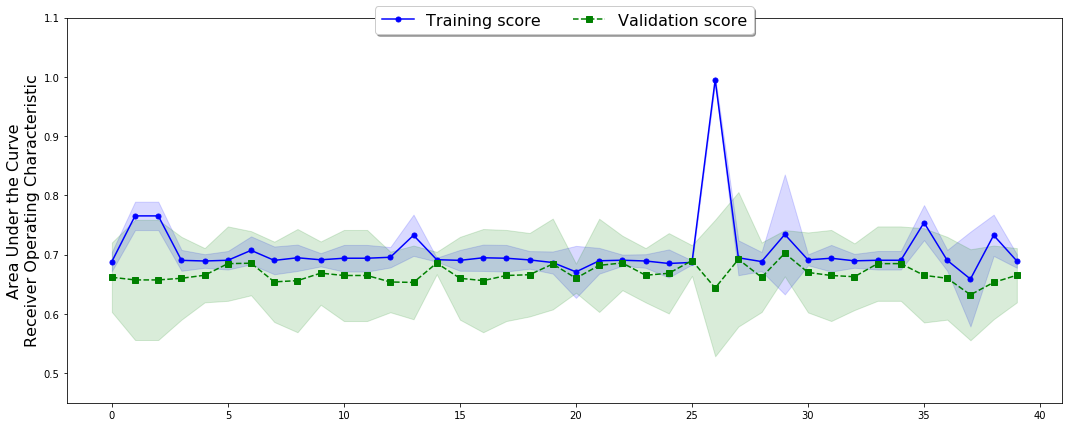

In [18]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(chi2_gbm_results, axis)

plt.ylim([0.45, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [19]:
print_params(chi2_gbm_results, estimator_name)

learning_rate
------------------------------------------------------------
Counter({1.7503980844862619: 4, 5.322332846651324: 3, 16.155661688954208: 3, 11.377662330089025: 3, 0.15682833095612492: 2, 1.5751666709297616: 2, 13.360891934300197: 2, 0.1424188678663357: 2, 4.408363698304624: 1, 8.744981868776764: 1, 0.8497986834000104: 1, 1.872002564710996: 1, 0.6827081850197226: 1, 16.95300631941769: 1, 0.989889306568595: 1, 27.50997121409958: 1, 4.362558140594501: 1, 0.7762760221725937: 1, 0.05181814759757531: 1, 11.8004940548567: 1, 2.0926188941453225: 1, 8.701144371133957: 1, 12.892858672053983: 1, 12.940469267966373: 1, 6.97917845816268: 1, 2.163623928713676: 1, 42.171601931468025: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({26.0: 4, 297.0: 4, 386.0: 3, 376.0: 3, 220.0: 3, 155.0: 2, 72.0: 2, 312.0: 1, 299.0: 1, 294.0: 1, 476.0: 1, 38.0: 1, 410.0: 1, 414.0: 1, 500.0: 1, 470.0: 1, 203.0: